In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")

In [4]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data = data.drop(["Unnamed: 32", "id"], axis=1)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
encoder = LabelEncoder()
data["diagnosis"] = encoder.fit_transform(data["diagnosis"])
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
X=data.drop('diagnosis',axis=1)
y=data['diagnosis']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state= 10)

In [9]:
print("X train shape: ", X_train.shape)
print("y train shape: ", y_train.shape)
print("X test shape: ", X_test.shape)
print("y test shape: ", y_test.shape)

X train shape:  (455, 30)
y train shape:  (455,)
X test shape:  (114, 30)
y test shape:  (114,)


In [10]:
from sklearn.linear_model import LogisticRegression

lreg_model = LogisticRegression(max_iter=10000)

lreg_model.fit(X_train, y_train)
y_pred_lreg_model = lreg_model.predict(X_test)

lreg_model_score = lreg_model.score(X_test, y_test)
print(lreg_model_score)

0.956140350877193


In [11]:
from sklearn import svm

svm_model = svm.SVC(C=100000)

svm_model.fit(X_train, y_train)
y_pred_svm_model  = svm_model.predict(X_test)

svm_model_score = svm_model.score(X_test, y_test)
print(svm_model_score)

0.9473684210526315


In [12]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

nb_model.fit(X_train, y_train)
y_pred_nb_model = nb_model.predict(X_test)

nb_model_score = nb_model.score(X_test, y_test)
print(nb_model_score)

0.956140350877193


In [13]:
from sklearn.tree import DecisionTreeClassifier

dtc_model = DecisionTreeClassifier(random_state=10)

dtc_model.fit(X_train, y_train)
y_pred_dtc_model = dtc_model.predict(X_test)

dtc_model_score = dtc_model.score(X_test, y_test)
print(dtc_model_score)

0.8596491228070176


In [14]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=1000, random_state=10)

rf_model.fit(X_train, y_train)
y_pred_rf_model = rf_model.predict(X_test)

rf_model_score = rf_model.score(X_test, y_test)
print(rf_model_score)

0.9824561403508771


In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=10)

knn_model.fit(X_train, y_train)
y_pred_knn_model = knn_model.predict(X_test)

knn_model_score = knn_model.score(X_test, y_test)
print(knn_model_score)

0.9298245614035088


In [16]:
models = list()
scores = list()
for vars in dir():
    if vars.endswith("_model_score"):
        print(f"{vars}: {eval(vars)}")
        models.append(vars)
        scores.append(eval(vars))

dtc_model_score: 0.8596491228070176
knn_model_score: 0.9298245614035088
lreg_model_score: 0.956140350877193
nb_model_score: 0.956140350877193
rf_model_score: 0.9824561403508771
svm_model_score: 0.9473684210526315


In [17]:
df = {'models': models, 'scores': scores}
pd.DataFrame.from_dict(df)

,models,scores
0,dtc_model_score,0.859649
1,knn_model_score,0.929825
2,lreg_model_score,0.956140
3,nb_model_score,0.956140
4,rf_model_score,0.982456
5,svm_model_score,0.947368


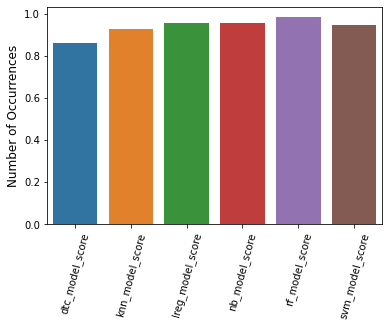

In [18]:
count  = df["scores"]
# plt.figure(figsize=(16,9))
sns.barplot(df["models"], df["scores"], alpha=1)
# plt.title('Tweets vs User Location')
plt.ylabel('Number of Occurrences', fontsize=12)
# plt.xlabel('State', fontsize=12)
plt.xticks(rotation=75)
plt.show()

# END: RandomForestClassifier has the highest Accuracy.
# Work in progress...